# Predicting Bike Rentals with Scikit-Learn
#### Daniel Torres - Updated 9/18/2020

#### [LinkedIn](https://www.linkedin.com/in/danielrichardtorres/) | [GitHub](https://github.com/danielrichardtorres) | [Back to Portfolio](https://danieltorres.tech)



## Introduction
### About
I completed this guided project by dataquest.io during a course on machine learning. 

I hope to demonstrate my python skills and ability to use scikit-learn to create machine learning models. In this project I will use linear regression, decision trees, and ensemble models to predict bike rentals.

### Background
Many cities have bike rental/sharing stations where you can rent bikes by the hour. Washington D.C collects information on the number of bikes people rent by hour and day. 

Hadi Fanaee-T at the University of Porto complied this data into a CSV which was provided in the guideded project. The file contains 17380 rows, with each row representing the number of bikes for a single hour of a given day.

### Goal:
Build a model to use to predict the total number of bikes rented in a given hour based off features in the dataset.

### Approach:
I will use scikit learn to build several models, using the Mean Squared Error (MSE) as the metric.  [I've learned from dataquest.io](https://app.dataquest.io/profile/deducingdaniel). I will start by:

- Importing the data
- Determining which columns are numeric and can be used as features
- Determining which column is the target column.
- Displaying the first few rows of the data to make sure it looks correct
- Move on to creating differnet models to predict the target from the features

### Results of the different models

| Model Type               	| Test 1             	| Test 2             	| Test 3             	|
|--------------------------	|--------------------	|--------------------	|--------------------	|
| Linear Regression        	| 17122 	| N/A                	| N/A                	|
| Decision Tree            	| 2684 	| 2853 	| 2722  	|
| Random Forest (ensemble) 	| 1959 	| 2742 	| 2015 	|

As you can see below, a linear model does not work well to predict this target. A nonlinear decision tree model works approximately 7 times better. In addition an ensemble model works even better.

##### Acknowledgements 
This project outline was provided by [dataquest.io](https://github.com/dataquestio/solutions) as a guided project.

# Checking Out the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [3]:
#let's take a look at the first few rows
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


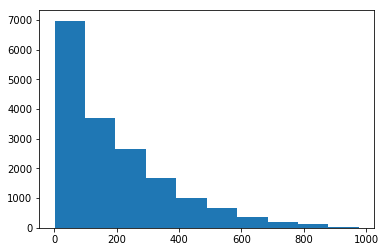

In [4]:
#get some graphing tools
%matplotlib inline
import matplotlib.pyplot as plt

#let's look at the target column distribution (the count of bike rentals)
plt.hist(bike_rentals['cnt'])
plt.show()

In [5]:
#let's see what else is related to the count
bike_rentals.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

# Cleaning the Data

### Making Time Buckets
I will make a new feature column called _time label_ to help my models. 

In [6]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3
    
    
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

# Making the Differnet Models

### Error metric
Before I make a model, I need a way to evaluate prediction ability. 

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [7]:
train = bike_rentals.sample(frac = 0.8)

In [8]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Applying a Linear Regression Model


In [9]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove('cnt')
predictors.remove('casual')
predictors.remove('dteday')
predictors.remove('registered')

In [10]:
reg = LinearRegression()
reg.fit(train[predictors], train['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
#let's see the error of the model I just made
import numpy
predictions = reg.predict(test[predictors])
mse = numpy.mean((predictions - test['cnt'])**2)
print("Mean squared error:", mse)

Mean squared error: 17122.99443724386


### Linear Regression Model Results
The error is fairly high. Likely due to the outliers which cause high error with this metric.

## Applying a Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf = 5)

reg.fit(train[predictors], train['cnt'])
predictions = reg.predict(test[predictors])

mse = numpy.mean((predictions - test['cnt'])**2)
print("Mean squared error:", mse)

Mean squared error: 2684.742035347036


In [13]:
reg = DecisionTreeRegressor(min_samples_leaf = 2) #note the change here

reg.fit(train[predictors], train['cnt'])
predictions = reg.predict(test[predictors])

mse = numpy.mean((predictions - test['cnt'])**2)
print("Mean squared error:", mse)

Mean squared error: 2928.0726569492435


In [14]:
reg = DecisionTreeRegressor(min_samples_leaf = 10)

reg.fit(train[predictors], train['cnt'])
predictions = reg.predict(test[predictors])

mse = numpy.mean((predictions - test['cnt'])**2)
print("Mean squared error:", mse)

Mean squared error: 2722.3022004563895


#### Decision Tree Results
By taking the nonlinear predictors into account the decision tree has a __much lower error than a linear regressor__

## Using an Ensemble Model

Here I will try a random forest model

In [15]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf = 5, n_estimators=10)
reg.fit(train[predictors], train['cnt'])
predictions = reg.predict(test[predictors])

mse = numpy.mean((predictions - test['cnt'])**2)
print("Mean squared error:", mse)

Mean squared error: 1959.052646321055


In [20]:
reg = RandomForestRegressor(min_samples_leaf = 20, n_estimators=10)
reg.fit(train[predictors], train['cnt'])
predictions = reg.predict(test[predictors])

mse = numpy.mean((predictions - test['cnt'])**2)
print("Mean squared error:", mse)

Mean squared error: 2853.5846115638537


In [19]:
reg = RandomForestRegressor(min_samples_leaf = 5, max_depth = 20, n_estimators=10)
reg.fit(train[predictors], train['cnt'])
predictions = reg.predict(test[predictors])

mse = numpy.mean((predictions - test['cnt'])**2)
print("Mean squared error:", mse)

Mean squared error: 2015.2984404143037


#### Ensemble Model Results

By using an ensemble of trees we got the best error yet.

However the model experienced diminishing returns. In other words we saw a much bigger jump from a linear model, to a decision tree. As compared to decision tree to ensemble.

## Final Thoughts on Predicting Bike Rentals

### Results of the different models

| Model Type               	| Test 1             	| Test 2             	| Test 3             	|
|--------------------------	|--------------------	|--------------------	|--------------------	|
| Linear Regression        	| 17122 	| N/A                	| N/A                	|
| Decision Tree            	| 2684 	| 2853 	| 2722  	|
| Random Forest (ensemble) 	| 1959 	| 2742 	| 2015 	|

### Effectiveness of Different Models and Approach
In the end I was able to use scikit-learn to make several machine learning models that were able to predict bike rentals based on time. 

The linear model was significantly worse than a decision tree model (6.8  times more error). In addition I was able to create a much better model (metric: MSE), by using an ensemble of decission trees. This ensemble is known as a random forest.

#### [LinkedIn](https://www.linkedin.com/in/danielrichardtorres/) | [GitHub](https://github.com/danielrichardtorres) | [Back to Portfolio](https://danieltorres.tech)
Dataquest Guided Project by Daniel Torres 